# [ANZ Chengdu Data Science Competition](http://www.dcjingsai.com/common/cmpt/ANZ%20Chengdu%20Data%20Science%20Competition_%E8%B5%9B%E4%BD%93%E4%B8%8E%E6%95%B0%E6%8D%AE.html?lang=en_US)




You are provided with a dataset which is related to 
- direct marketing campaigns (phone calls) of a banking institution. 
- The business problem is to predict whether the client will subscribe to a term deposit. 

Participants are expected to 
- undertake a thorough analysis of the dataset and build a prediction model to solve this business problem.  
- Business suggestions are welcomed but not mandatory.  
- Participants will be required to submit analysis along with modelling/algorithm design and validation for judging.  

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')
sklearn.__version__


'0.20.1'

In [4]:
df = pd.read_csv('bank-additional-train.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,32,management,married,professional.course,unknown,no,no,cellular,jul,mon,...,4,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
1,41,admin.,married,high.school,no,yes,yes,cellular,apr,mon,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
2,32,admin.,married,university.degree,no,yes,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no
3,37,admin.,married,high.school,no,unknown,unknown,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
4,38,admin.,divorced,university.degree,no,no,no,cellular,jul,tue,...,8,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no


In [5]:
len(df)

37069

In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

# Data

a)Input variables:

### bank client data:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has home loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')

### related with the last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular','telephone') 
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### other attributes:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### social and economic context attributes：
16. emp.var.rate: employment variation rate. quarterly indicator (numeric)
17. cons.price.idx: consumer price index. monthly indicator (numeric) 
18. cons.conf.idx: consumer confidence index. monthly indicator (numeric) 
19. euribor3m: euribor 3 month rate. daily indicator (numeric)
20. nr.employed: number of employees. quarterly indicator (numeric)

b)Output variable (desired target):

21. y - has the client subscribed a term deposit? (binary: 'yes','no')



In [7]:
df['y'][:5]

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [8]:
df["y"][df["y"] == "no"] = 0
df["y"][df["y"] == "yes"] = 1

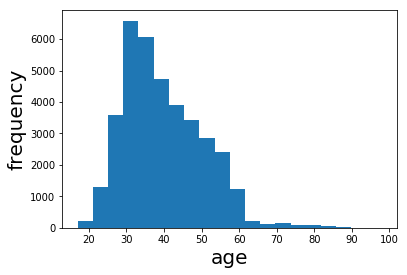

In [9]:
plt.hist(df.age, bins = 20)
plt.xlabel('age', fontsize = 20)
plt.ylabel('frequency', fontsize = 20)
plt.show()

# One-hot encoding

https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features

In [10]:
dat = pd.get_dummies(df)

In [11]:
dat.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oc

In [12]:
dat.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_0,y_1
0,32,565,4,999,0,1.4,93.918,-42.7,4.962,5228.1,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,41,982,1,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,32,188,2,999,0,-1.8,92.893,-46.2,1.299,5099.1,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,37,56,3,999,0,1.4,93.918,-42.7,4.968,5228.1,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,38,419,8,999,0,1.4,93.918,-42.7,4.961,5228.1,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


# Machine Learning

In [13]:
X = dat.drop(['y_0', 'y_1'], axis = 1)
y = dat['y_1']

### Hold-out Samples

In [14]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1, train_size = 0.8)

In [15]:
?train_test_split

In [16]:
Xtrain.shape, ytrain.shape, X.shape

((29655, 63), (29655,), (37069, 63))

### Naive Bayes

In [17]:
from sklearn.naive_bayes import GaussianNB # BernoulliNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [35]:
from sklearn.metrics import accuracy_score, roc_auc_score,  roc_curve, auc
accuracy_score(ytest, y_model)

0.86147828432694906

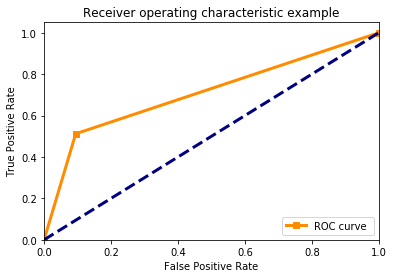

In [69]:
fpr,tpr,thresholds = roc_curve(ytest,y_model,pos_label=1)
plt.plot(fpr, tpr, color='darkorange', marker= 's', lw=3, label='ROC curve ')
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


In [65]:
auc(fpr, tpr)

0.70878837342077916

In [19]:
roc_auc_score(ytest, y_model)

0.70878837342077916

### Cross-validation

In [38]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=10)

array([ 0.87055016,  0.86080388,  0.8626922 ,  0.86026436,  0.86458052,
        0.86350148,  0.87240356,  0.86377124,  0.8712898 ,  0.86589315])

In [39]:
import numpy as np
np.mean(cross_val_score(model, X, y, cv=10))

0.8655750373019897

# Reference

1. S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014
2. The dataset and its attribute information are obtained from UCI Machine Learning Repository:
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing